<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase17_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 17 (Viernes 30 de mayo, 2025)
---

Veamos un ejemplo.

## Estimación de densidad con series ortogonales

Sea $X$ una variable aleatoria con densidad $f \in L^2(0,1)$.

Sea $\{\varphi_j\}$ una base ortonormal de $L^2$, entonces existen $\{\theta_j\}$ tales que:

$$
f(x) = \sum_{j=1}^\infty \theta_j \varphi_j(x)
$$

donde:

$$
\theta_j = \langle \varphi_j, f \rangle = \int_0^1 \varphi_j(x) f(x)\, dx = \mathbb{E}[\varphi_j(X)]
$$

Una forma de estimar $\theta_j$ aprovechando la Ley Fuerte de los Grandes Números es:

$$
\hat{\theta}_j := \frac{1}{n} \sum_{i=1}^n \varphi_j(X_i) \xrightarrow{\text{c.s.}} \theta_j, \quad \mathbb{E}[\hat{\theta}_j] = \theta_j
$$

Entonces definimos las aproximaciones truncadas:

$$
f_N(x) = \sum_{j=1}^N \theta_j \varphi_j(x), \quad
\hat{f}_N(x) = \sum_{j=1}^N \hat{\theta}_j \varphi_j(x)
$$

La diferencia entre $f$ y $\hat{f}_N$ se descompone como:

$$
f - \hat{f}_N = f - f_N + f_N - \hat{f}_N = f - \sum_{j=1}^N \theta_j \varphi_j + \sum_{j=1}^N \theta_j \varphi_j - \hat{\theta}_j \varphi_j
$$

Agrupando:

$$
= \sum_{j=N+1}^\infty \theta_j \varphi_j + \sum_{j=1}^N (\theta_j - \hat{\theta}_j) \varphi_j
$$

- Primer término: **Error de truncamiento** (sesgo)
- Segundo término: **Error estadístico** (varianza)

Entonces:

$$
\|f - \hat{f}_N\|^2 = \sum_{j=N+1}^\infty \theta_j^2 + \sum_{j=1}^N (\theta_j - \hat{\theta}_j)^2
$$

Esto se deduce porque las $\varphi_j$ forman una base ortonormal y se usa el teorema de **Parseval** (o algo parecido 😄).


# Estimación de densidad con series ortogonales en Julia

En este ejemplo estimamos la densidad de una variable aleatoria cuya distribución es la suma de dos uniformes independientes sobre $[-\pi, \pi]$, lo cual da una densidad triangular. Usamos una base ortonormal de Fourier para aproximarla con $N$ coeficientes.

---



In [ ]:
# Ejecutar esta celda primero en Google Colab
using Pkg
Pkg.add("Plots")
Pkg.add("StatsBase")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [2913bbd2] + StatsBase v0.34.5
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


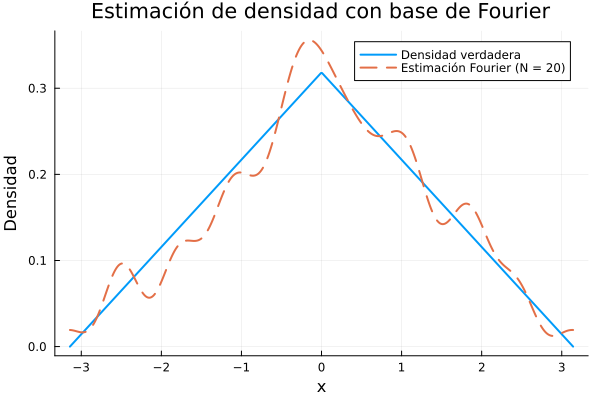

In [ ]:
using Plots, StatsBase, Random

# Base ortonormal de Fourier en [-π, π]
function ϕ(j, x)
    if j == 0
        return fill(1 / sqrt(2π), length(x))
    elseif isodd(j)
        k = (j + 1) ÷ 2
        return cos.(k .* x) ./ sqrt(π)
    else
        k = j ÷ 2
        return sin.(k .* x) ./ sqrt(π)
    end
end

# Estimación de coeficientes usando una muestra
function θ̂(j, X)
    return mean(ϕ(j, X))
end

# Aproximación de la densidad con N términos
function f̂_N(x, X, N)
    return sum(θ̂(j, X) .* ϕ(j, x) for j in 0:N-1)
end

# Densidad triangular verdadera en [-π, π]
function true_density(x)
    return (abs.(x) .<= π) .* (π .- abs.(x)) ./ π^2
end

# Simular datos: suma de dos uniformes independientes en [-π, π]
n = 1000
X = 0.5 .* (2π .* rand(n) .- π .+ 2π .* rand(n) .- π)

# Puntos para graficar
xvals = range(-π, π; length=500)
N = 20
f_est = f̂_N(xvals, X, N)
f_true = true_density(xvals)

# Gráfica
plot(xvals, f_true, label="Densidad verdadera", lw=2)
plot!(xvals, f_est, label="Estimación Fourier (N = $N)", lw=2, linestyle=:dash)
xlabel!("x")
ylabel!("Densidad")
title!("Estimación de densidad con base de Fourier")


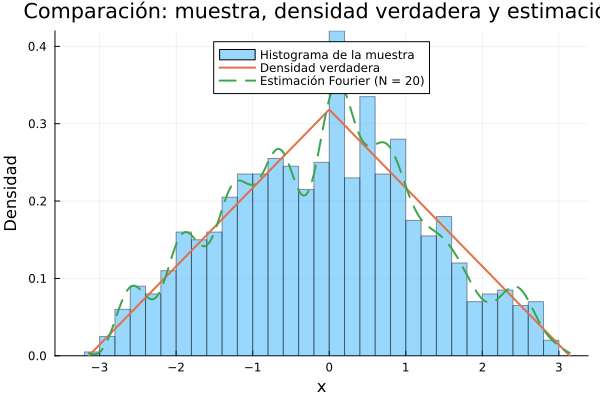

In [ ]:
using Plots, StatsBase, Random

# Base ortonormal de Fourier en [-π, π]
function ϕ(j, x)
    if j == 0
        return fill(1 / sqrt(2π), length(x))
    elseif isodd(j)
        k = (j + 1) ÷ 2
        return cos.(k .* x) ./ sqrt(π)
    else
        k = j ÷ 2
        return sin.(k .* x) ./ sqrt(π)
    end
end

# Estimación de coeficientes usando una muestra
function θ̂(j, X)
    return mean(ϕ(j, X))
end

# Aproximación de la densidad con N términos
function f̂_N(x, X, N)
    return sum(θ̂(j, X) .* ϕ(j, x) for j in 0:N-1)
end

# Densidad triangular verdadera en [-π, π]
function true_density(x)
    return (abs.(x) .<= π) .* (π .- abs.(x)) ./ π^2
end

# Simular datos: suma de dos uniformes independientes en [-π, π]
n = 1000
X = 0.5 .* (2π .* rand(n) .- π .+ 2π .* rand(n) .- π)

# Puntos para graficar
xvals = range(-π, π; length=500)
N = 20
f_est = f̂_N(collect(xvals), X, N)
f_true = true_density(xvals)

# Graficar histograma + densidad verdadera + estimación
histogram(X; bins=30, normalize=true, alpha=0.4, label="Histograma de la muestra", legend=:top)
plot!(xvals, f_true; lw=2, label="Densidad verdadera")
plot!(xvals, f_est; lw=2, linestyle=:dash, label="Estimación Fourier (N = $N)")
xlabel!("x")
ylabel!("Densidad")
title!("Comparación: muestra, densidad verdadera y estimación")
